### Q1


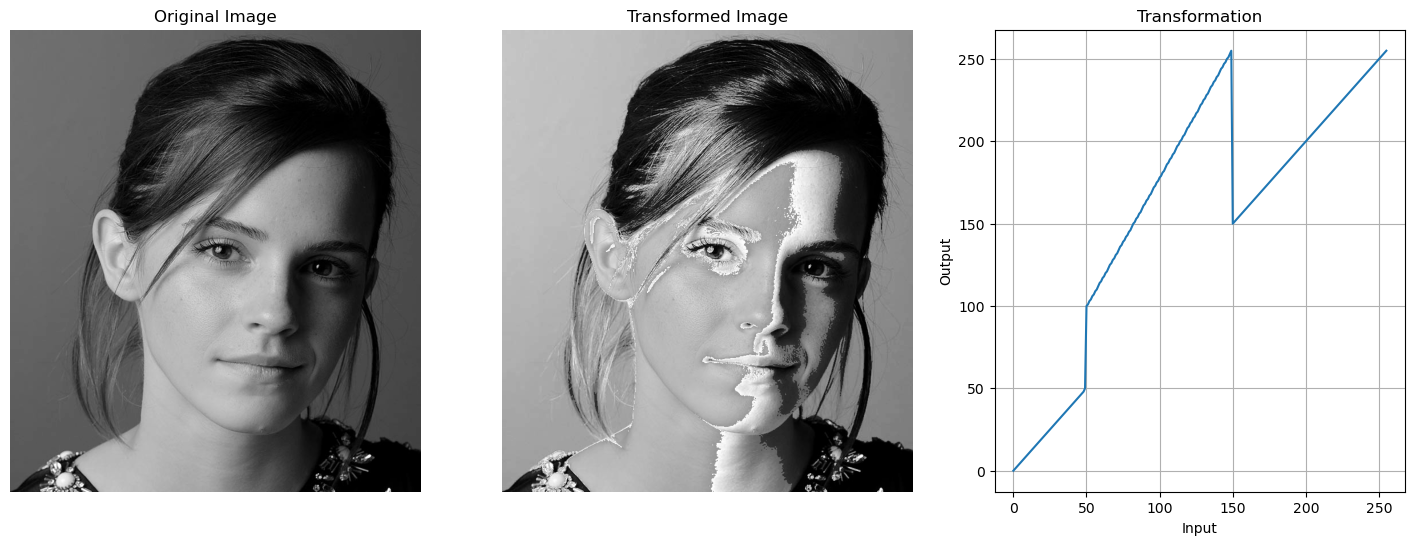

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

control_points = np.array([[50, 50], [50, 100], [150, 255], [150, 150]], dtype=np.uint8)

t1 = np.linspace(0, control_points[0, 1], control_points[0, 0] - 0).astype(np.uint8)
t2 = np.linspace(control_points[1, 1], control_points[2, 1], control_points[2, 0] - control_points[1, 0]).astype(np.uint8)
t3 = np.linspace(control_points[3, 1], 255, 255 - control_points[3, 0] + 1).astype(np.uint8)

transform = np.concatenate((t1, t2, t3), axis=0).astype(np.uint8)
# print(len(transform))

transformed_image = cv.LUT(image, transform)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Transformed Image')
axs[1].axis('off')

axs[2].plot(transform)
axs[2].set_title('Transformation')
axs[2].set_xlabel('Input')
axs[2].set_ylabel('Output')
axs[2].grid()



[]


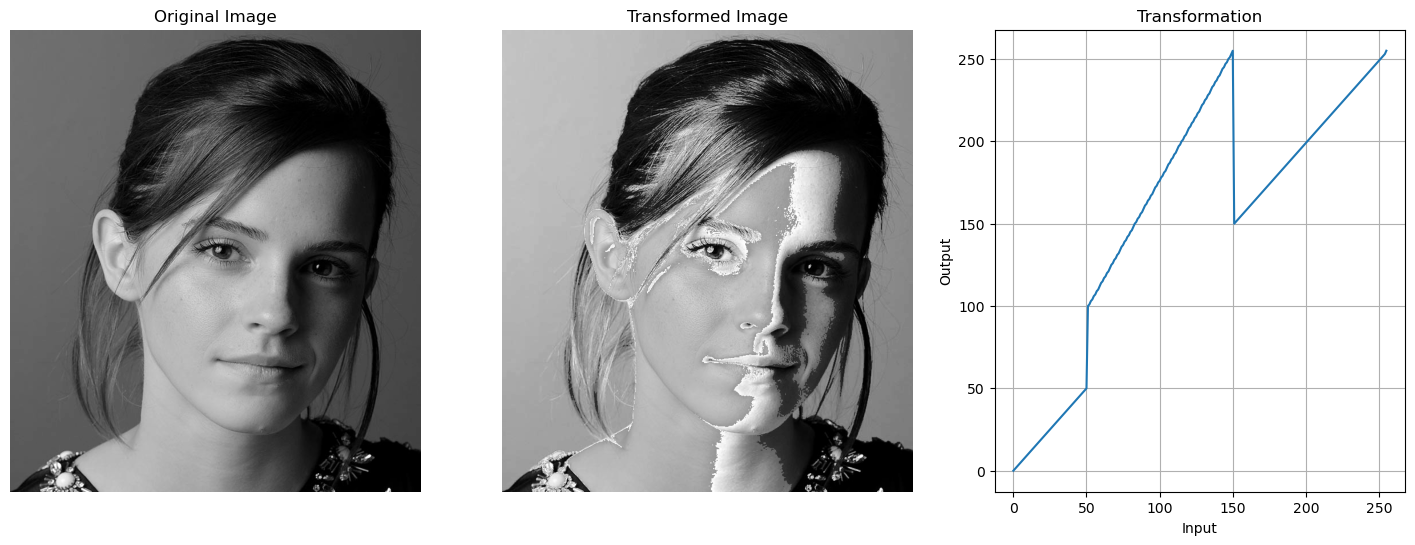

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread('a1images/emma.jpg', cv.IMREAD_GRAYSCALE)

points = np.array([[0, 0], [50, 50], [50, 100], [150, 255], [150, 150], [255, 255]], dtype=np.uint8)

# t1 = np.linspace(points[0, 1], points[1, 1], points[1, 0] - points[0, 0] + 1).astype(np.uint8)
# t2 = np.linspace(points[1, 1], points[2, 1], points[2, 0] - points[1, 0]).astype(np.uint8)
# t3 = np.linspace(points[2, 1], points[3, 1], points[3, 0] - points[2, 0]).astype(np.uint8)
# t4 = np.linspace(points[3, 1], points[4, 1], points[4, 0] - points[3, 0]).astype(np.uint8)
# t5 = np.linspace(points[4, 1], points[5, 1], points[5, 0] - points[4, 0]).astype(np.uint8)
# print(len(t1), len(t2), len(t3), len(t4), len(t5))

# transform = np.concatenate((t1, t2, t3, t4, t5), axis=0).astype(np.uint8)
# print(len(transform))
transform = np.array([], dtype=np.uint8)
print(transform)

for i in range(len(points) - 1):
    if i == 0:
        transform = np.concatenate((transform, np.linspace(points[i, 1], points[i+1, 1], points[i+1, 0] - points[i, 0] + 1).astype(np.uint8)), axis=0)
        
    else:
        transform = np.concatenate((transform, np.linspace(points[i, 1], points[i+1, 1], points[i+1, 0] - points[i, 0]).astype(np.uint8)), axis=0)

transformed_image = cv.LUT(image, transform)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(transformed_image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Transformed Image')
axs[1].axis('off')

axs[2].plot(transform)
axs[2].set_title('Transformation')
axs[2].set_xlabel('Input')
axs[2].set_ylabel('Output')
axs[2].grid()

### Q2

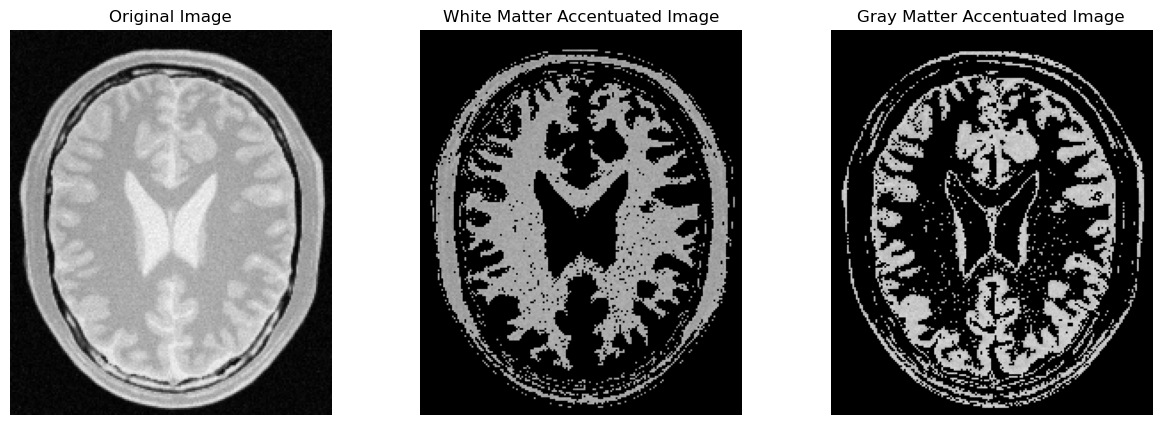

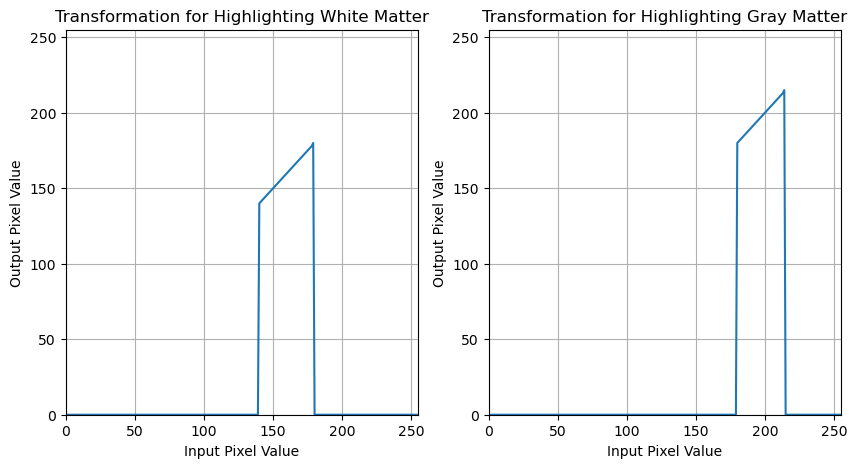

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

image = cv.imread("a1images/brain_proton_density_slice.png", cv.IMREAD_GRAYSCALE)

# White matter appear darker than gray matter in the proton density image, 
# so we have to enhance the white matter by mapping lower pixel values to higher ones and vice versa for gray matter. 
white_lower_threshold = 140
white_upper_threshold = 180
gray_lower_threshold = 180
gray_upper_threshold = 215

def create_mask(lower_threshold, upper_threshold):
    mask = np.zeros(256, dtype=np.uint8)
    mask[lower_threshold:upper_threshold] = np.linspace(lower_threshold, upper_threshold, upper_threshold - lower_threshold).astype(np.uint8)
    return mask

white_mask = create_mask(white_lower_threshold, white_upper_threshold)
gray_mask = create_mask(gray_lower_threshold, gray_upper_threshold)

white_enhanced = cv.LUT(image, white_mask)
gray_enhanced = cv.LUT(image, gray_mask)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(white_enhanced, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('White Matter Accentuated Image')
axs[1].axis('off')  

axs[2].imshow(gray_enhanced, cmap='gray', vmin=0, vmax=255)
axs[2].set_title('Gray Matter Accentuated Image')
axs[2].axis('off')

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

# Plot Transfromation to accentuate the white matter
axs[0].plot(white_mask)
axs[0].set_title('Transformation for Highlighting White Matter')

# Plot transformation to accentuate the gray matter
axs[1].plot(gray_mask)
axs[1].set_title('Transformation for Highlighting Gray Matter')

for ax in axs:
    ax.set_xlabel('Input Pixel Value')
    ax.set_ylabel('Output Pixel Value')
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.grid()

### Q3

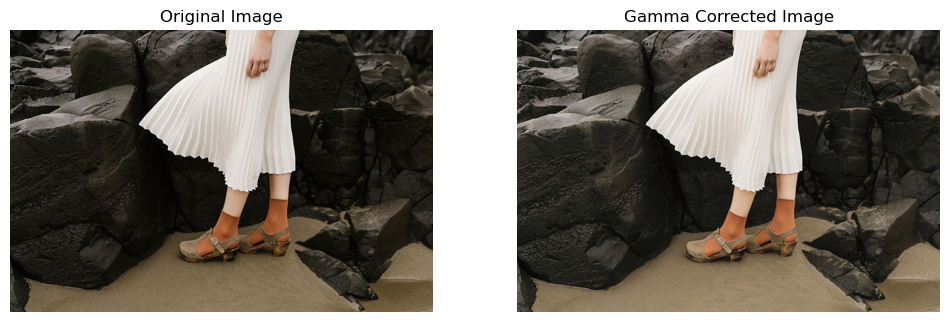

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

img_bgr = cv.imread("a1images/highlights_and_shadows.jpg")
# Converting the image to Lab color space
img_lab = cv.cvtColor(img_bgr, cv.COLOR_BGR2Lab)
# Splitting the Lab image into its channels
l_channel, a_channel, b_channel = cv.split(img_lab)
gamma = 0.8
# Normalizing the L channel, applying gamma correction and rescale
l_gamma_corrected = (np.power(l_channel / 255.0, gamma) * 255.0).astype(np.uint8)
l_gamma_corrected = np.clip(l_gamma_corrected, 0, 255).astype(np.uint8)
# Merging the channels back
img_corrected = cv.merge((l_gamma_corrected, a_channel, b_channel))
img_corrected_bgr = cv.cvtColor(img_corrected, cv.COLOR_Lab2BGR)

fig, axs = plt.subplots(1, 2, figsize=(12, 12))
axs[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(img_corrected, cv.COLOR_Lab2RGB))
axs[1].set_title('Gamma Corrected Image')
axs[1].axis('off')

plt.show()

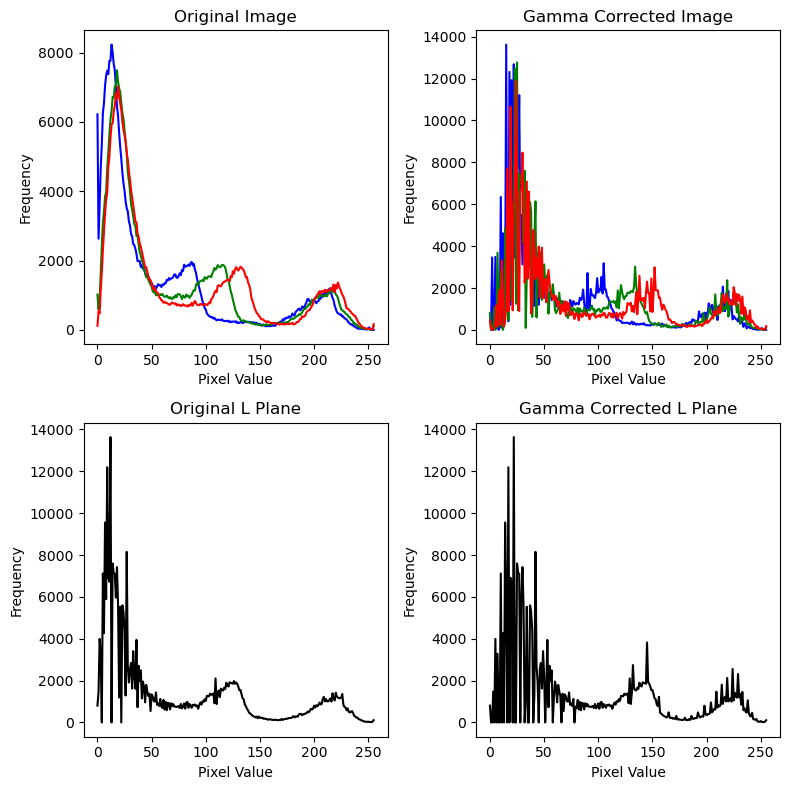

In [6]:
colors = ['b', 'g', 'r']

fig, axs = plt.subplots(2, 2, figsize=(8, 8))

for i, color in enumerate(colors):
    original_hist = cv.calcHist([img_bgr], [i], None, [256], [0, 256])
    axs[0][0].plot(original_hist, color=color)
    corrected_hist = cv.calcHist([img_corrected_bgr], [i], None, [256], [0, 256])
    axs[0][1].plot(corrected_hist, color=color)

axs[0][0].set_title('Original Image')
axs[0][0].set_xlabel('Pixel Value')
axs[0][0].set_ylabel('Frequency')

axs[0][1].set_title('Gamma Corrected Image')
axs[0][1].set_xlabel('Pixel Value')
axs[0][1].set_ylabel('Frequency')

original_l_hist = cv.calcHist([l_channel], [0], None, [256], [0, 256])
axs[1][0].plot(original_l_hist, color='k')
axs[1][0].set_title('Original L Plane')
axs[1][0].set_xlabel('Pixel Value')
axs[1][0].set_ylabel('Frequency')

corrected_l_hist = cv.calcHist([l_gamma_corrected], [0], None, [256], [0, 256])
axs[1][1].plot(corrected_l_hist, color='k')
axs[1][1].set_title('Gamma Corrected L Plane')
axs[1][1].set_xlabel('Pixel Value')
axs[1][1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### Q4: Vibrance Enhancement Using Intensity Transformation

**Task:**  
Increase the vibrance of a photograph by applying the following intensity transformation to the saturation plane:

$$
f(x) = \min \left( x + a \times 128 e^{- \frac{(x-128)^2}{2\sigma^2}},\ 255 \right)
$$

where $x$ is the input intensity, $a \in [0, 1]$, and $\sigma = 70$.

**Steps:**
1. Split the image shown in Fig. 4 into hue, saturation, and value planes.
2. Apply the above intensity transformation to the saturation plane.
3. Adjust $a$ to get a visually pleasing output. Report the value of $a$.
4. Recombine the three planes.
5. Display the original image, vibrance-enhanced image, and the intensity transformation

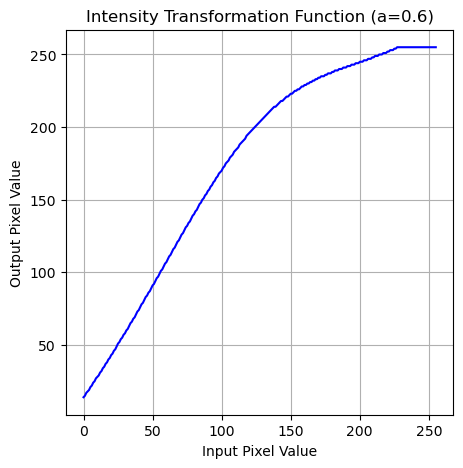

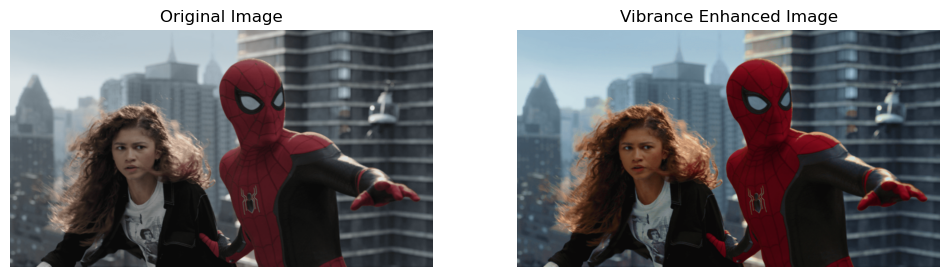

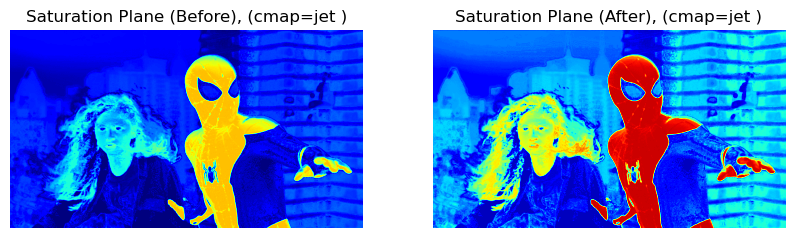

In [7]:
img_bgr = cv.imread("a1images/spider.png")
# Splitting the image into hue, saturation and value planes
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

# Applying the transformation to the saturation plane
a = 0.6
sigma = 70
x = np.arange(0, 256)
f = np.minimum(x + a*128*np.exp(-((x - 128) ** 2) / (2 * sigma ** 2)), 255).astype(np.uint8)
s_transformed = cv.LUT(s, f)

# Merging planes
img_transformed_hsv = cv.merge((h, s_transformed, v))

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(f, color='b')
ax.set_title(f'Intensity Transformation Function (a={a})')
ax.set_xlabel('Input Pixel Value')
ax.set_ylabel('Output Pixel Value')
ax.grid()

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(cv.cvtColor(img_transformed_hsv, cv.COLOR_HSV2RGB))
axs[1].set_title('Vibrance Enhanced Image')
axs[1].axis('off')

# Saturation plane before and after the transformation
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

cmap = 'jet'
axs[0].imshow(s, cmap=cmap, vmin=0, vmax=255)
axs[0].set_title(f'Saturation Plane (Before), (cmap={cmap} )')
axs[0].axis('off')

axs[1].imshow(s_transformed, cmap=cmap, vmin=0, vmax=255)
axs[1].set_title(f'Saturation Plane (After), (cmap={cmap} )')
axs[1].axis('off')

plt.show()

### Q5

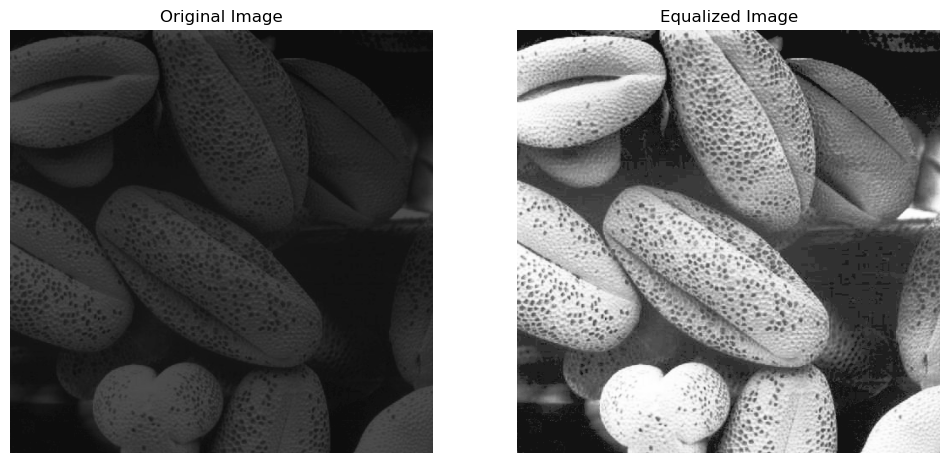

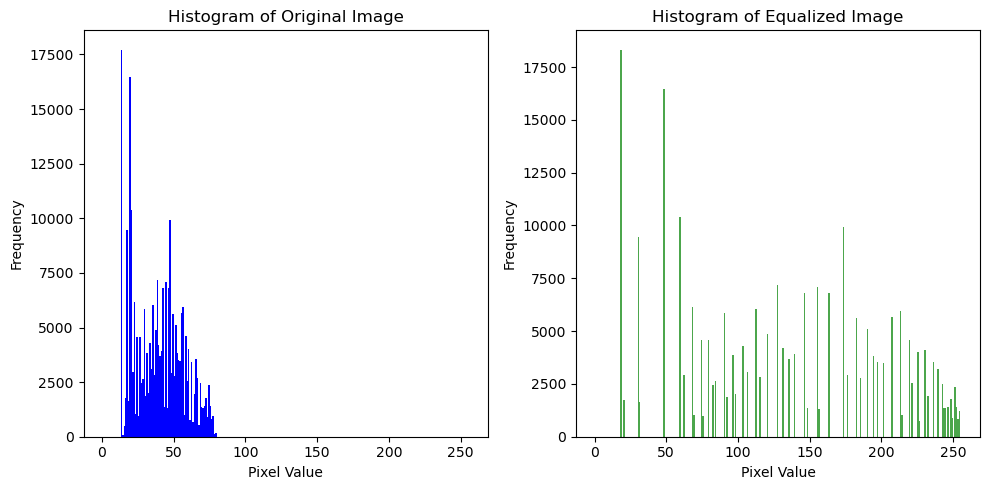

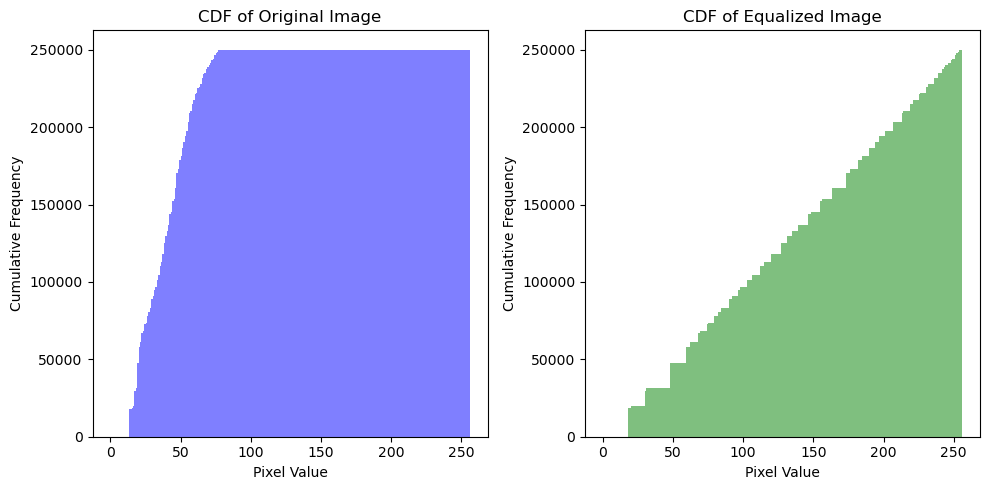

In [8]:
img = cv.imread("a1images/shells.tif", cv.IMREAD_GRAYSCALE)


fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')

# def histogram_equalization(img):
#     L = 256
#     hist, bins = np.histogram(img.flatten(), 256, [0, 256])
#     normalized_hist = hist / hist.sum()
#     cdf = normalized_hist.cumsum().astype(np.uint8)
#     scaled_cdf = (L - 1) * cdf
#     equalized_img = scaled_cdf[img]

#     return equalized_img

def histogram_equalization(img):
    M, N = img.shape
    L = 256
    t = np.zeros(256, dtype=np.uint8)
    hist = cv.calcHist([img], [0], None, [256], [0, 256]).flatten()
    cdf = hist.cumsum()
    t = np.array([(L-1)/(M*N)*cdf[i] for i in range(256)], dtype=np.uint8)
    equalized_img = t[img]
    return equalized_img

# Plot the image after equalization
equalized_img = histogram_equalization(img)
axs[1].imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
axs[1].set_title('Equalized Image')
axs[1].axis('off')

# Plot the histograms and cdfs
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(img.flatten(), bins=256, range=[0, 256], color='blue')
axs[0].set_title('Histogram of Original Image')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Frequency')

axs[1].hist(equalized_img.flatten(), bins=256, range=[0, 256], color='green', alpha=0.7)
axs[1].set_title('Histogram of Equalized Image')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Frequency')
plt.tight_layout()

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].hist(img.flatten(), bins=256, range=[0, 256], color='blue', alpha = 0.5, cumulative=True)
axs[0].set_title('CDF of Original Image')
axs[0].set_xlabel('Pixel Value')
axs[0].set_ylabel('Cumulative Frequency')

axs[1].hist(equalized_img.flatten(), bins=256, range=[0, 256], color='green', alpha=0.5, cumulative=True)
axs[1].set_title('CDF of Equalized Image')
axs[1].set_xlabel('Pixel Value')
axs[1].set_ylabel('Cumulative Frequency')
plt.tight_layout()
plt.show()


### Q5

(a) Open the image in Fig. 6, split it into hue, saturation, and values and display these planes in grayscale.

(b) Select the appropriate plane to threshold in extract the foreground mask. A mask is a binary image.

(c) Now obtain the foreground only using cv.bitwise_and and compute the histogram.

(d) Obtain the cumulative sum of the histogram using np.cumsum.

(e) Use the formulas in slides to histogram-equalize the foreground.

(f) Extract the background and add with the histogram equalized foreground

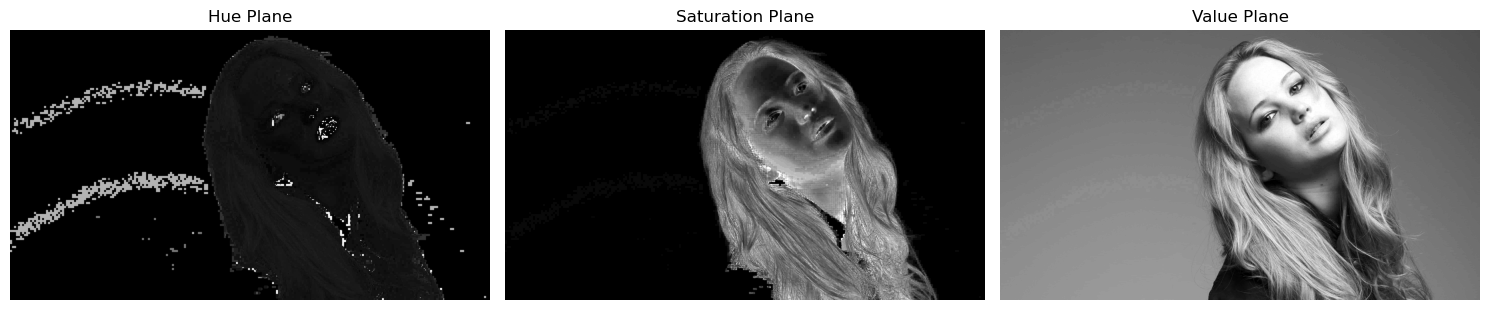

In [46]:
img_bgr = cv.imread("a1images/jeniffer.jpg")
img_hsv = cv.cvtColor(img_bgr, cv.COLOR_BGR2HSV)
h, s, v = cv.split(img_hsv)

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(h, cmap='gray')
axs[0].set_title('Hue Plane')
axs[0].axis('off')
axs[1].imshow(s, cmap='gray')
axs[1].set_title('Saturation Plane')
axs[1].axis('off')
axs[2].imshow(v, cmap='gray')
axs[2].set_title('Value Plane')
axs[2].axis('off')
plt.tight_layout()

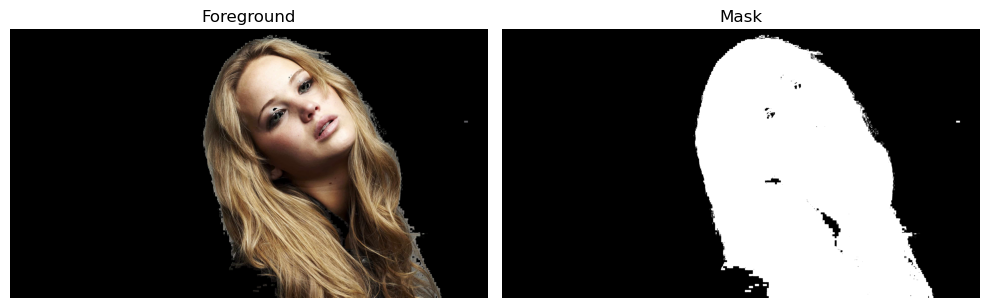

In [61]:
mask = cv.inRange(img_hsv, (0, 12, 0), (255, 255, 255))
foreground = cv.bitwise_and(img_bgr, img_bgr, mask=mask)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axs[0].set_title('Foreground')
axs[0].axis('off')
axs[1].imshow(mask, cmap='gray')
axs[1].set_title('Mask')
axs[1].axis('off')
plt.tight_layout()


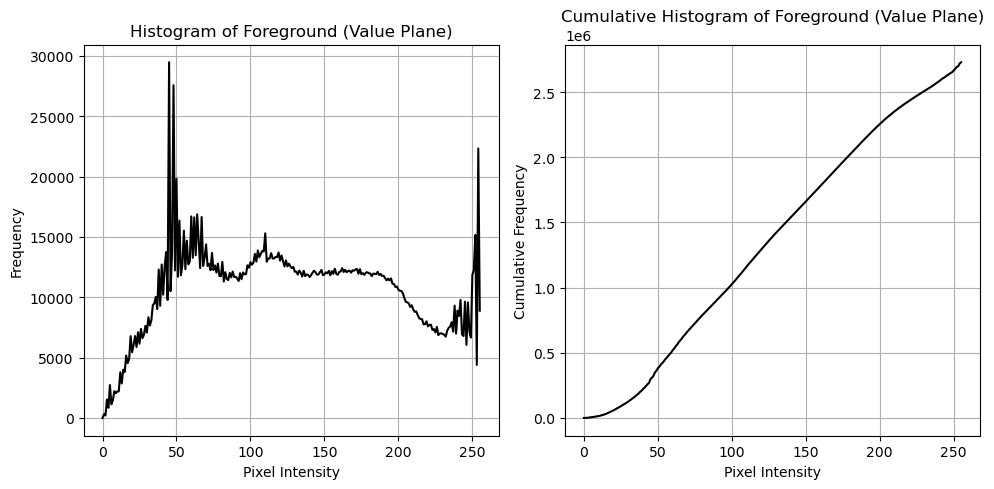

In [53]:
foreground_v = cv.bitwise_and(v, v, mask=mask)

hist_v = cv.calcHist([foreground_v], [0], mask, [256], [0, 256] )
cdf_v = np.cumsum(hist_v)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist_v, color='black', label='Value Plane')
axs[0].set_title('Histogram of Foreground (Value Plane)')
axs[0].set_xlabel('Pixel Intensity')
axs[0].set_ylabel('Frequency')
axs[0].grid()
axs[1].plot(cdf_v, color='black', label='Cumulative Frequency')
axs[1].set_title('Cumulative Histogram of Foreground (Value Plane)')
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Cumulative Frequency')
axs[1].grid()
plt.tight_layout()

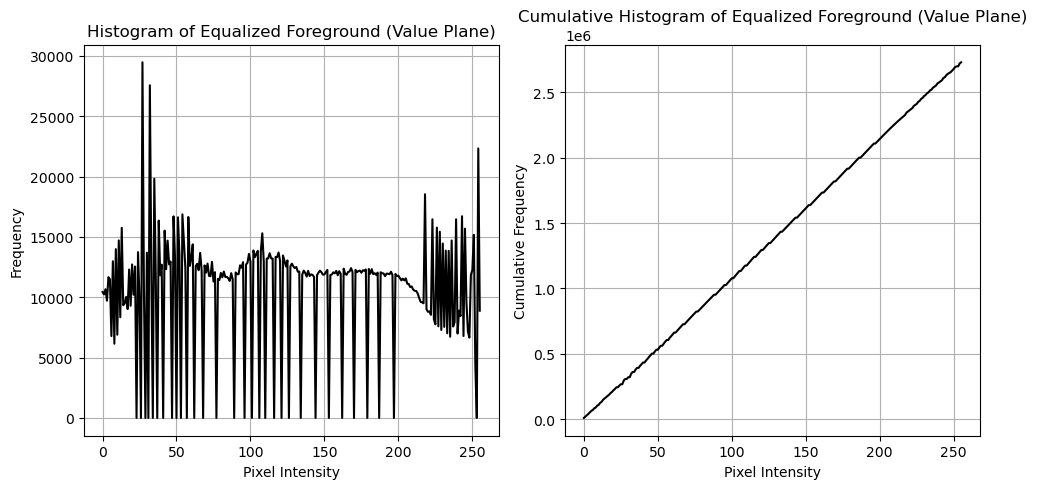

In [ ]:
# Histogram Equalization
L = 256
pixels = cdf_v[-1] # using only the foreground pixels for transformation

t = np.array([(L-1)/(pixels)*cdf_v[i] for i in range(256)], dtype=np.uint8)
v_equalized = t[foreground_v]

hist = cv.calcHist([v_equalized], [0], mask, [256], [0, 256])
cdf = np.cumsum(hist)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].plot(hist, color='black', label='Value Plane')
axs[0].set_title('Histogram of Equalized Foreground (Value Plane)')
axs[0].set_xlabel('Pixel Intensity')
axs[0].set_ylabel('Frequency')
axs[0].grid()
axs[1].plot(cdf, color='black', label='Cumulative Frequency')
axs[1].set_title('Cumulative Histogram of Equalized Foreground (Value Plane)')
axs[1].set_xlabel('Pixel Intensity')
axs[1].set_ylabel('Cumulative Frequency')
axs[1].grid()
plt.tight_layout()
plt.show()

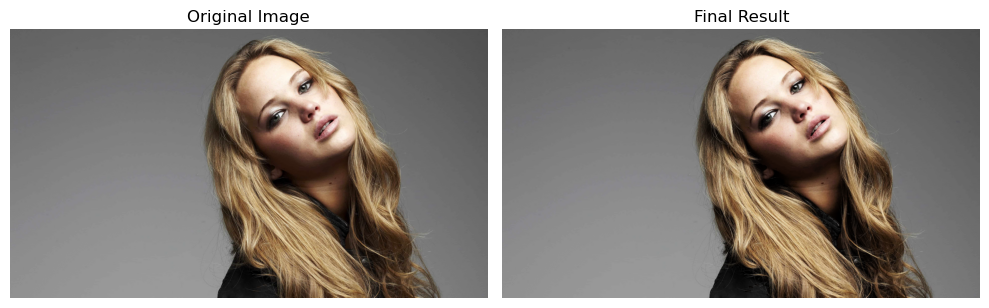

In [58]:
merged_hsv = cv.merge((h, s, v_equalized))
merged_bgr = cv.cvtColor(merged_hsv, cv.COLOR_HSV2BGR)

background = cv.bitwise_and(img_bgr, img_bgr, mask=cv.bitwise_not(mask))

final_result = cv.add(background, merged_bgr)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB))
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(cv.cvtColor(final_result, cv.COLOR_BGR2RGB))
axs[1].set_title('Final Result')
axs[1].axis('off')
plt.tight_layout()
plt.show()

### Q7

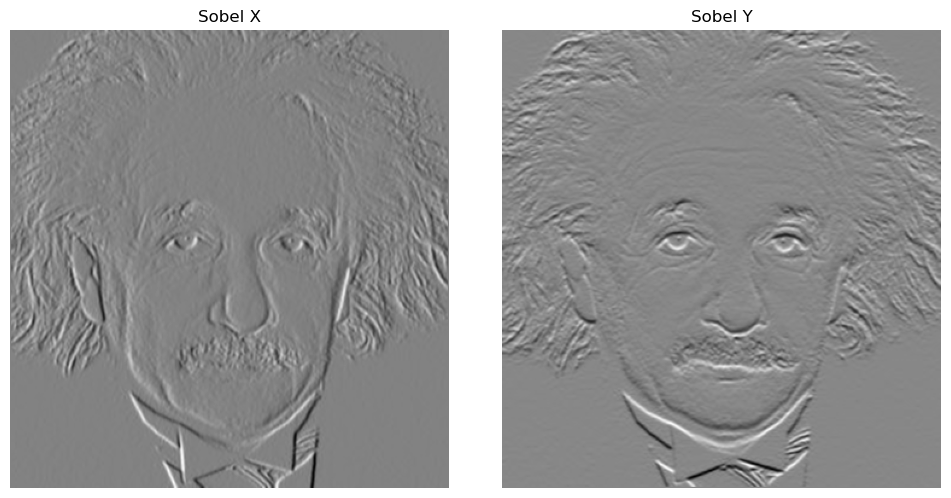

In [67]:
img_bgr = cv.imread('a1images/einstein.png', cv.IMREAD_GRAYSCALE)

sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

sobel_x_result = cv.filter2D(img_bgr, cv.CV_64F, sobel_x)
sobel_y_result = cv.filter2D(img_bgr, cv.CV_64F, sobel_y)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(sobel_x_result, cmap='gray')
axs[0].set_title('Sobel X')
axs[0].axis('off')

axs[1].imshow(sobel_y_result, cmap='gray')
axs[1].set_title('Sobel Y')
axs[1].axis('off')

plt.tight_layout()
plt.show()

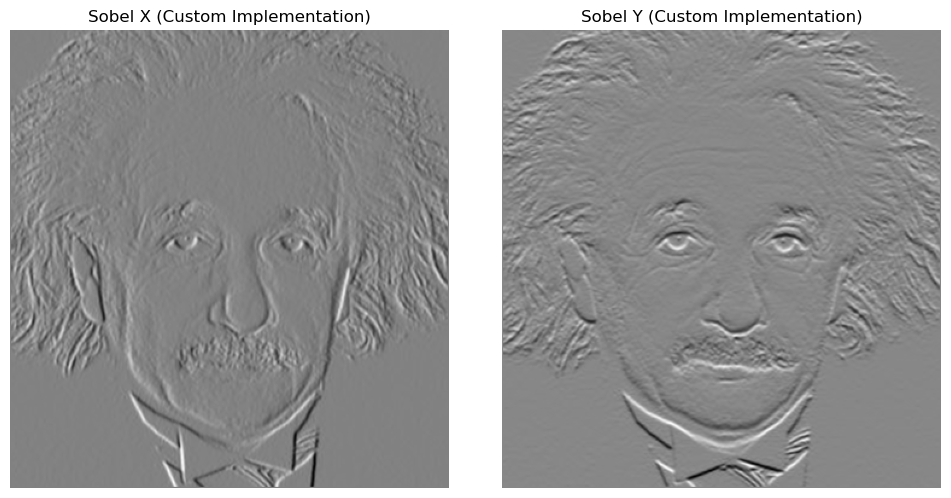

In [72]:
def sobel_filter(image, filter):
    filtered_image = np.zeros_like(image, dtype=np.float64)

    for i in range(image.shape[0] - 2):
        for j in range(image.shape[1] - 2):
            filtered_image[i+1, j+1] = np.sum(image[i:i+3, j:j+3] * filter)
    return filtered_image

sobel_x_result = sobel_filter(img_bgr, sobel_x)
sobel_y_result = sobel_filter(img_bgr, sobel_y)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(sobel_x_result, cmap='gray')
axs[0].set_title('Sobel X (Custom Implementation)')
axs[0].axis('off')

axs[1].imshow(sobel_y_result, cmap='gray')
axs[1].set_title('Sobel Y (Custom Implementation)')
axs[1].axis('off')

plt.tight_layout()
plt.show()

In [75]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])

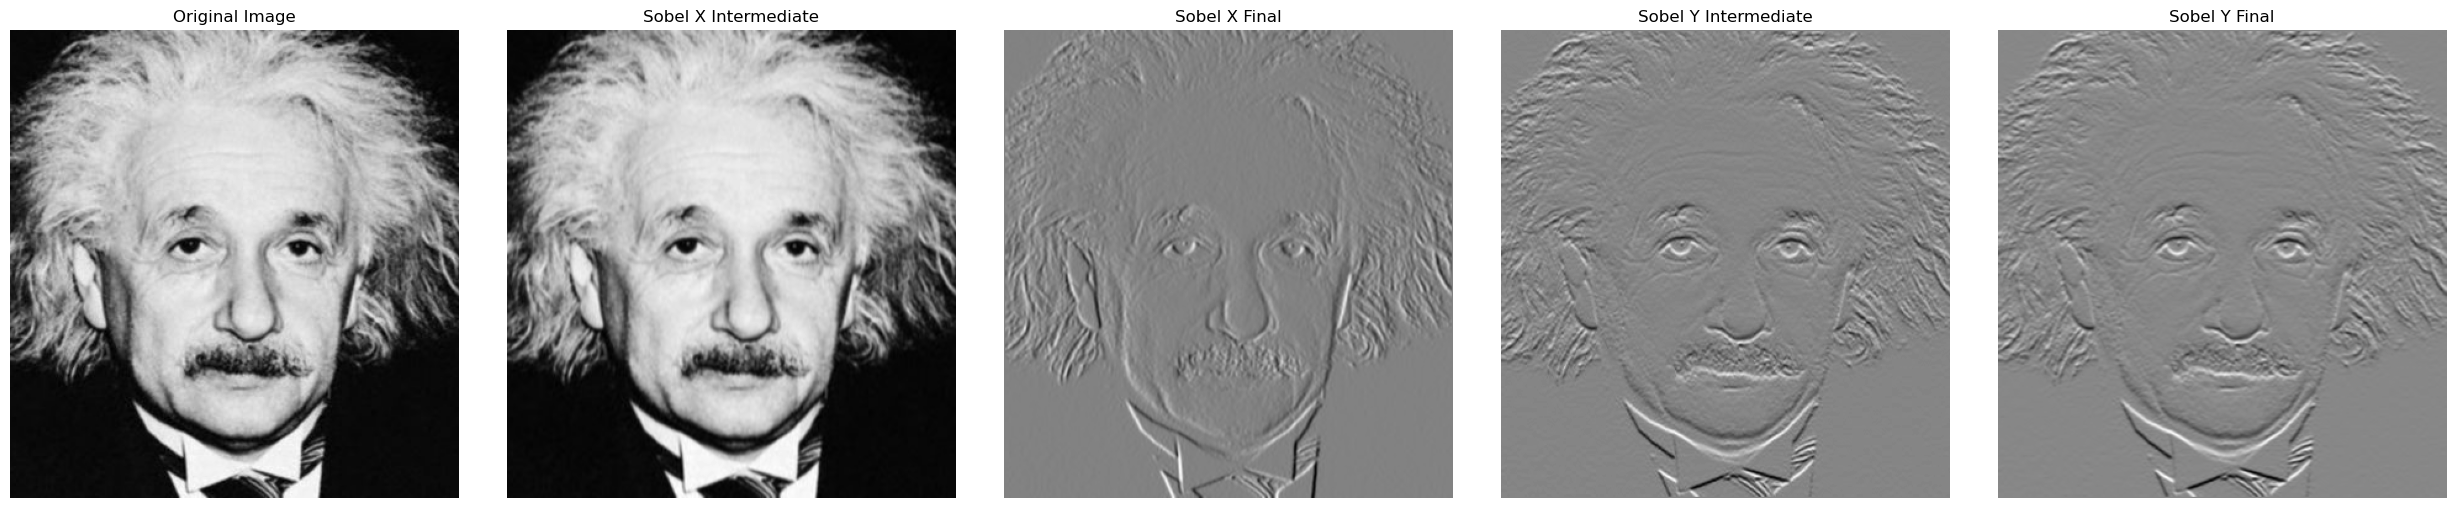

In [ ]:
sobel_x_col = np.array([[1], [2], [1]])
sobel_x_row = np.array([[-1, 0, 1]])

sobel_y_col = np.array([[-1], [0], [1]])
sobel_y_row = np.array([[1, 2, 1]])

sobel_x_intermediate = cv.filter2D(img_bgr, cv.CV_64F, sobel_x_col)
sobel_x_final = cv.filter2D(sobel_x_intermediate, cv.CV_64F, sobel_x_row)

sobel_y_intermediate = cv.filter2D(img_bgr, cv.CV_64F, sobel_y_col)
sobel_y_final = cv.filter2D(sobel_y_intermediate, cv.CV_64F, sobel_y_row)

fig, axs = plt.subplots(1, 5, figsize=(25, 5))
axs[0].imshow(img_bgr, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(sobel_x_intermediate, cmap='gray')
axs[1].set_title('Sobel X Intermediate')
axs[1].axis('off')

axs[2].imshow(sobel_x_final, cmap='gray')
axs[2].set_title('Sobel X Final')
axs[2].axis('off')

axs[3].imshow(sobel_y_intermediate, cmap='gray')
axs[3].set_title('Sobel Y Intermediate')
axs[3].axis('off')

axs[4].imshow(sobel_y_final, cmap='gray')
axs[4].set_title('Sobel Y Final')
axs[4].axis('off')

plt.tight_layout()
plt.show()


In [79]:
# print whether img_bgr and the sobel_x_intermediate are the same
print(np.array_equal(img_bgr, sobel_x_intermediate))
#print first 100 pixel values of each
print("First 100 pixel values of img_bgr:", img_bgr.flatten()[:100])
print("First 100 pixel values of sobel_x_intermediate:", sobel_x_intermediate.flatten()[:100])

False
First 100 pixel values of img_bgr: [  7   7   7   8   8   7   7   8   8   8   8   9   9   9   8   8   7   7
   8   8   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9   9
   9  11  11  10  10   9   9   8   8   8   7   7   7   9  11  14  16  17
  14  18  21  23  34  43  39  23  27  33  38  43  46  50  53  50  38  32
  40  52  57  53  48  36  44  80 121 121  92  86 105 131 130 106  86 107
 144 163 166 147 138 142 149 149 154 149]
First 100 pixel values of sobel_x_intermediate: [ 28.  28.  30.  32.  32.  28.  28.  32.  32.  32.  32.  36.  36.  36.
  32.  32.  28.  28.  32.  32.  36.  36.  36.  36.  36.  36.  36.  36.
  36.  36.  36.  36.  36.  36.  36.  36.  36.  44.  44.  42.  40.  36.
  34.  32.  32.  30.  28.  28.  32.  44.  56.  70.  78.  78.  60.  68.
  74.  80. 122. 154. 136.  72.  84.  98. 108. 120. 140. 172. 196. 198.
 150. 140. 198. 260. 266. 230. 198. 174. 176. 298. 486. 536. 444. 400.
 442. 514. 532. 458. 390. 472. 610. 654. 636. 572. 538. 550. 564. 558.
 596. 5